In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [66]:
dataset_url = '/content/alzheimers_bioactivity_data_pIC50_pubchem_fp_AB.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879


In [67]:
X = dataset.drop("pIC50", axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
Y = dataset["pIC50"]
Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [69]:
Y = Y.fillna(Y.mean())
Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [70]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X= remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
915,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
916,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
917,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [71]:
X_df = pd.DataFrame(X)
corr_matrix = X_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X1= X_df.drop(columns=to_drop)
X1

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819
0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
915,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
916,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
917,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [72]:
from sklearn.feature_selection import SelectKBest, f_regression
X_df = pd.DataFrame(X1)
k = 115
selector = SelectKBest(score_func=f_regression, k=k)
X2= selector.fit_transform(X_df, Y)
X2

array([[1, 1, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [73]:
selected_columns = X1.columns[selector.get_support()]

In [74]:
X2_df = pd.DataFrame(X2, columns=selected_columns)
X2_df.to_csv('descriptor_list.csv', index=False)
X2_df

,PubchemFP2,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP150,...,PubchemFP714,PubchemFP716,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP777,PubchemFP798,PubchemFP800,PubchemFP818
0,1,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
915,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
916,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
917,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X2_df, Y, test_size=0.2, random_state=42)

In [76]:
X_train.shape, Y_train.shape

((735, 115), (735,))

In [77]:
X_test.shape, Y_test.shape

((184, 115), (184,))

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, Y_train)
Y_pred_svr = svr_model.predict(X_test)

print("\n🔹 Support Vector Regressor (SVR)")
print("R² score :", r2_score(Y_test, Y_pred_svr))
print("MAE:", mean_absolute_error(Y_test, Y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_svr)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_svr) / Y_test)) * 100)



🔹 Support Vector Regressor (SVR)
R² score : 0.7587491934668575
MAE: 0.4974357925097059
RMSE: 0.67918040364254
MAPE: 8.729236007355606


In [80]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, Y_train)
Y_pred_gb = gb_model.predict(X_test)

print("\n🔹 Gradient Boosting Regressor")
print("R² score :", r2_score(Y_test, Y_pred_gb))
print("MAE:", mean_absolute_error(Y_test, Y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_gb)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_gb) / Y_test)) * 100)



🔹 Gradient Boosting Regressor
R² score : 0.7389724038345864
MAE: 0.5305042129393422
RMSE: 0.7064704023294437
MAPE: 9.348972698771346


In [81]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost Regressor")
print("R² score :", r2_score(Y_test, Y_pred_xgb))
print("MAE:", mean_absolute_error(Y_test, Y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_xgb) / Y_test)) * 100)



🔹 XGBoost Regressor
R² score : 0.7617099291148157
MAE: 0.48586866719210603
RMSE: 0.6749999381077109
MAPE: 8.405097026762824


In [82]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])
voting_model.fit(X_train, Y_train)

Y_pred_vote = voting_model.predict(X_test)

print("\n🔹 Voting Regressor")
print("R² score :", r2_score(Y_test, Y_pred_vote))
print("MAE:", mean_absolute_error(Y_test, Y_pred_vote))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_vote)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_vote) / Y_test)) * 100)



🔹 Voting Regressor
R² score : 0.7767744945391392
MAE: 0.4688850723083407
RMSE: 0.6533150566597743
MAPE: 8.108507590286395


In [83]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, Y_train)
Y_pred_bag = bag_model.predict(X_test)

print("\n🔹 Bagging Regressor")
print("R² score :", r2_score(Y_test, Y_pred_bag))
print("MAE:", mean_absolute_error(Y_test, Y_pred_bag))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_bag)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_bag) / Y_test)) * 100)



🔹 Bagging Regressor
R² score : 0.7768704842674642
MAE: 0.46936182003372867
RMSE: 0.6531745747784504
MAPE: 8.16386228193243


In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest Regressor")
print("R² score :", r2_score(Y_test, Y_pred_rf))
print("MAE:", mean_absolute_error(Y_test, Y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("MAPE:", np.mean(np.abs((Y_test - Y_pred_rf) / Y_test)) * 100)



🔹 Random Forest Regressor
R² score : 0.7802028048000613
MAE: 0.4692099754019344
RMSE: 0.648278819868724
MAPE: 8.151064539708397


In [85]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, BaggingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
from tabulate import tabulate

models = {
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Bagging Regressor": BaggingRegressor(n_estimators=100, random_state=42),
    "Voting Regressor": VotingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)),
        ('gbr', GradientBoostingRegressor(random_state=42))
    ]),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    mape = mean_absolute_percentage_error(Y_test, y_pred) * 100  # %

    results.append({
        "Model": name,
        "R² Score": round(r2, 4),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "MAPE": f"{round(mape, 2)} %"
    })


results_df = pd.DataFrame(results)
print("\n Model Performance Comparison:\n")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))



 Model Performance Comparison:

╒═══════════════════╤════════════╤═══════╤════════╤════════╕
│ Model             │   R² Score │   MAE │   RMSE │ MAPE   │
╞═══════════════════╪════════════╪═══════╪════════╪════════╡
│ Gradient Boosting │     0.739  │ 0.531 │  0.706 │ 9.35 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ SVR               │     0.751  │ 0.509 │  0.69  │ 8.91 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ XGBoost           │     0.7617 │ 0.486 │  0.675 │ 8.41 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ Bagging Regressor │     0.7769 │ 0.469 │  0.653 │ 8.16 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ Voting Regressor  │     0.7697 │ 0.486 │  0.664 │ 8.52 % │
├───────────────────┼────────────┼───────┼────────┼────────┤
│ Random Forest     │     0.7802 │ 0.469 │  0.648 │ 8.15 % │
╘═══════════════════╧════════════╧═══════╧════════╧════════╛


In [86]:
Y_pred = rf_model.predict(X_test)
Y_pred

array([6.5292587 , 5.83254303, 5.50089711, 5.08757312, 5.5249972 ,
       6.58856187, 5.21914227, 6.5561579 , 5.81220028, 4.77166753,
       4.99867492, 5.14554284, 4.92570498, 5.81815115, 6.67235842,
       7.61917038, 5.45470504, 3.95999437, 5.59729686, 5.177661  ,
       5.42832511, 7.21419292, 5.02251284, 5.90957443, 4.91654306,
       6.9878702 , 4.80160354, 4.90644201, 4.61019197, 7.94703317,
       5.20126404, 7.04357172, 7.29041741, 5.24700479, 4.66014714,
       5.64242188, 5.57379953, 4.95279124, 7.50799059, 7.07512273,
       6.33498982, 4.97101968, 7.62286111, 7.6049644 , 6.27222579,
       4.72014181, 4.75853167, 5.66000282, 8.38621809, 4.43860478,
       5.71349672, 5.17297916, 4.95918731, 6.23018823, 5.26608714,
       5.61838429, 5.19355664, 7.50799059, 5.2798589 , 7.78674788,
       5.74386483, 5.42058649, 5.31827933, 7.50799059, 5.45230238,
       8.26448284, 4.99867492, 5.71662655, 5.26954623, 5.07494626,
       6.8771055 , 5.44981969, 7.94703317, 6.1852532 , 5.07487

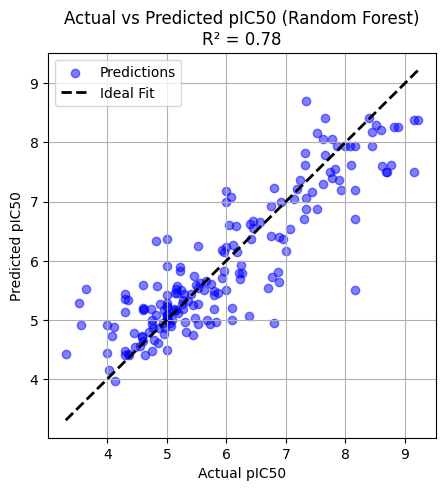

In [87]:
import matplotlib.pyplot as plt

Y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred_rf)

plt.figure(figsize=(5, 5))
plt.scatter(Y_test, Y_pred_rf, alpha=0.5, color='blue', label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")

plt.title(f"Actual vs Predicted pIC50 (Random Forest)\nR² = {r2:.2f}")
plt.legend()
plt.grid(True)
plt.savefig('Actual vs Predicted pIC50 (Random Forest).pdf')
plt.show()

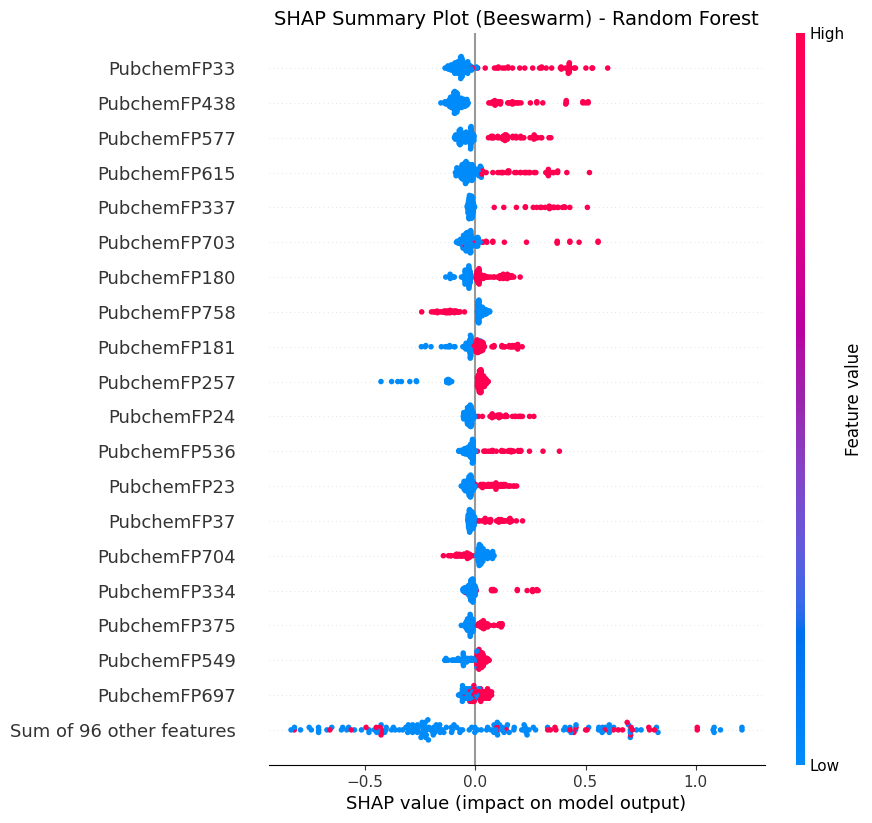

In [94]:
import shap
import matplotlib.pyplot as plt

explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_test)

plt.title("SHAP Summary Plot (Beeswarm) - Random Forest", fontsize=14)
shap.plots.beeswarm(shap_values_rf, max_display=20)

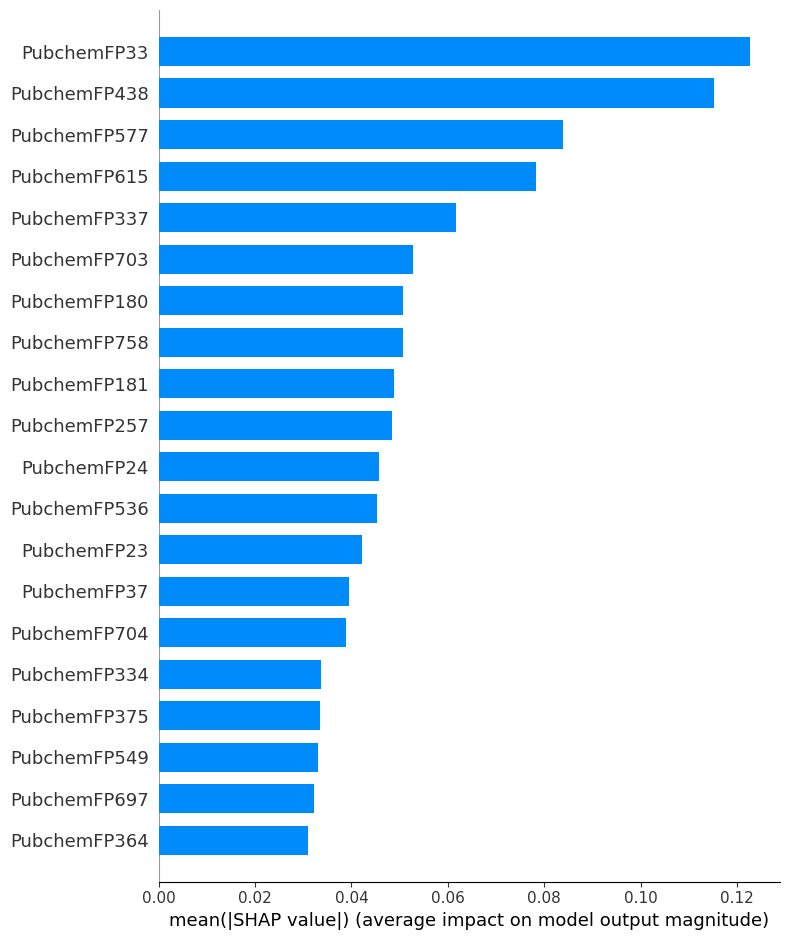

<Figure size 640x480 with 0 Axes>

In [89]:
import shap
import matplotlib.pyplot as plt

explainer_rf = shap.Explainer(rf_model, X_train)

shap_values_rf = explainer_rf(X_test)

plt.title("SHAP Feature Importance (Bar Plot) - Random Forest", fontsize=6)
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")
plt.savefig('SHAP Feature Importance (Bar Plot).pdf')

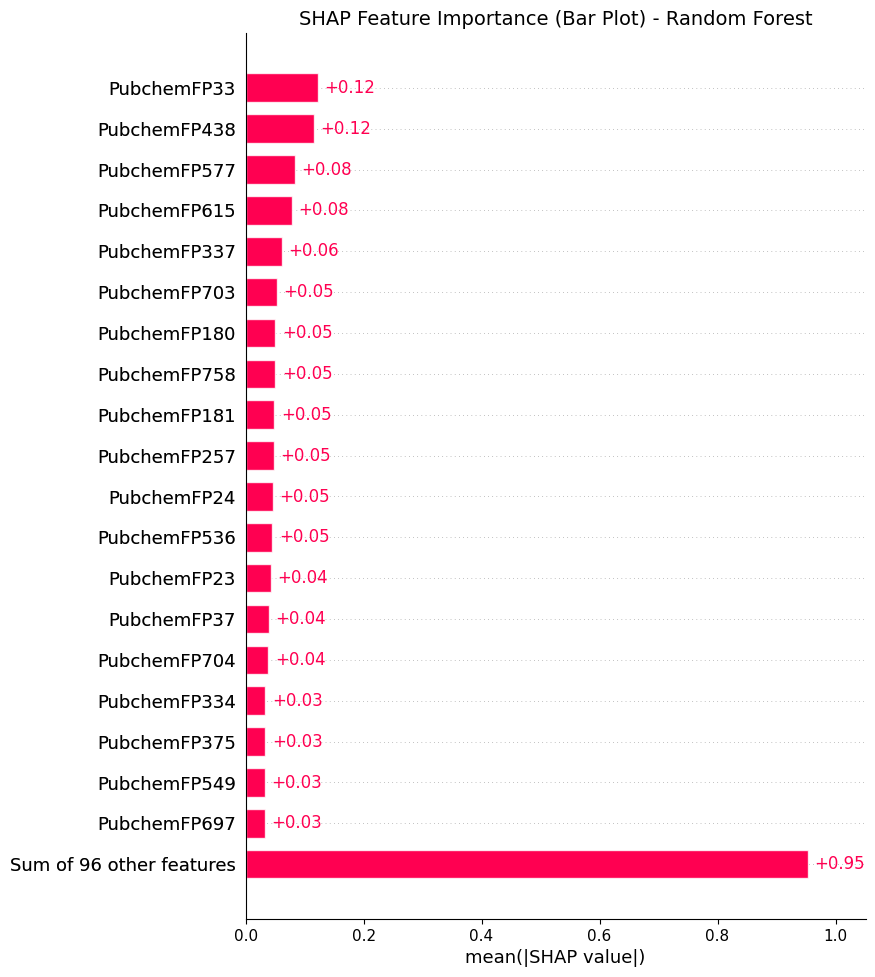

In [90]:
plt.title("SHAP Feature Importance (Bar Plot) - Random Forest", fontsize=14)
shap.plots.bar(shap_values_rf, max_display=20)

In [91]:
import joblib
import pickle
filename = 'bioactivity_prediction_model.pkl'
pickle.dump(rf_model, open('bioactivity_prediction_model.pkl', 'wb'))


In [92]:
! zip -r results.zip . -i *.csv *.pdf

updating: alzheimers_bioactivity_data_pIC50_pubchem_fp_AB.csv (deflated 96%)
updating: descriptor_list.csv (deflated 95%)
updating: SHAP Feature Importance (Bar Plot).pdf (deflated 49%)
updating: SHAP Summary Plot (Beeswarm).pdf (deflated 49%)
updating: Actual vs Predicted pIC50 (Random Forest).pdf (deflated 26%)
